In [1]:
%reset -f
M3Dsynth_dir = '/home/giada.zingarini/M3Dsynth' # insert the correct path

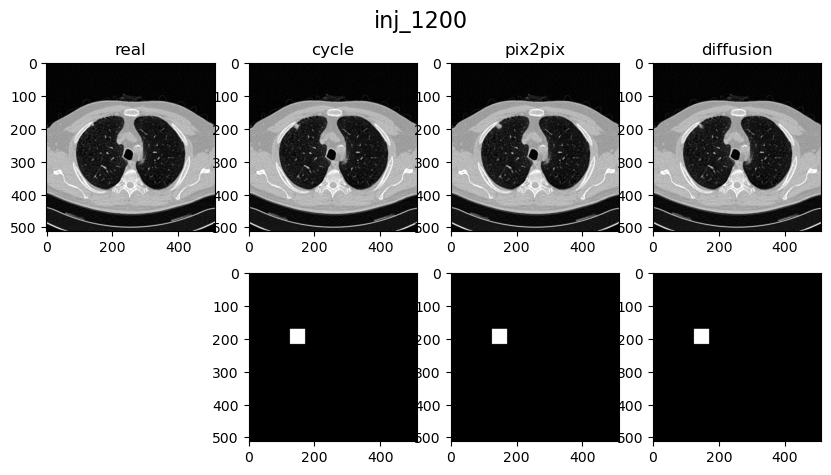

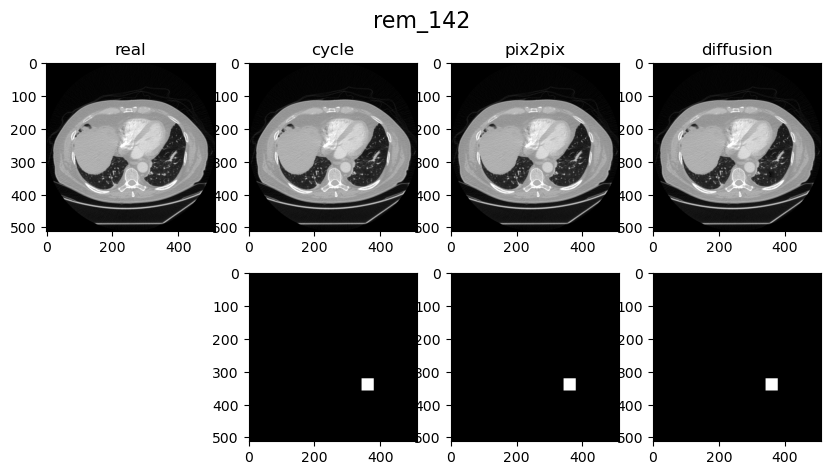

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils.tiff_utils import load_tiff_scan, load_slice_tiff_scan, get_shape_tiff_scan
from utils.tiff_utils import get_percentile_tiff_scan, apply_percentile
list_mod = ['real', 'cycle', 'pix2pix', 'diffusion']
list_img = [('inj_1200', 96), ('rem_142', 160)]

for img, slide in list_img:
    fig = plt.figure(figsize=(10,5))
    for ind, mod in enumerate(list_mod):
        scan_directory = os.path.join(M3Dsynth_dir, mod, 'scan', img)
        shape = get_shape_tiff_scan(scan_directory)
        
        scan = load_slice_tiff_scan(scan_directory, shape, np.uint16, slide, slide+1)[0]
        low, high = get_percentile_tiff_scan(scan_directory, np.uint16)
        scan = apply_percentile(scan, low, high)
        plt.subplot(2,len(list_mod),ind+1)
        plt.imshow(scan, cmap='gray', clim=[0,1])
        plt.title(mod)
        
        if mod!='real':
            mask_directory = os.path.join(M3Dsynth_dir, mod, 'label', img)
            mask = load_slice_tiff_scan(mask_directory, shape, np.bool_, slide, slide+1)[0]
            plt.subplot(2,len(list_mod),ind+5)
            plt.imshow(mask, cmap='gray', clim=[0,1])
    
    fig.suptitle(img, fontsize=16)
    plt.show()